<a href="https://colab.research.google.com/github/ThaiNguyenLongHai/Hai/blob/main/ProjectCuoiKi_ThaiNguyenLongh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thai Nguyen Long Hai 20146248

In [ ]:
pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.6/349.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 82.4 MB/s eta 0:00:00
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367705 sha256=47c43dbc733f48c194b50c9e24f2458008dc5b0262b5618b3948c7e51f914815
  Stored in directory: /root/.cache/pip/wheels/0e/8c/42/bcd0934b61ecf4cef964ccc9881888cca0841ec72266e99de1
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [ ]:
import tensorflow as tf
import matplotlib. pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow. keras.preprocessing import image
from tensorflow.keras import layers
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import RMSprop 
from keras.models import Sequential
from sklearn.metrics import accuracy_score #Do Luong
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import load_model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_generator = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)

train_dataset = image_generator.flow_from_directory(batch_size = 32,
                                                    directory ="/content/drive/MyDrive/AI_Face_Gp",
                                                    shuffle = True,
                                                    target_size = (150,150),
                                                    subset = "training",
                                                    class_mode ='categorical')
validation_dataset = image_generator.flow_from_directory(batch_size = 32,
                                                    directory ="/content/drive/MyDrive/AI_Face_Gp",
                                                    shuffle = True,
                                                    target_size = (150,150),
                                                    subset = "validation",
                                                    class_mode ='categorical')

train_dataset.class_indices

Found 1847 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


{'Female': 0, 'Male': 1}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation ='relu',kernel_initializer ='he_uniform',padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32,(3,3),activation ='relu',kernel_initializer ='he_uniform',padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),activation ='relu',kernel_initializer ='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation ='relu',kernel_initializer ='he_uniform',padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3),activation ='relu',kernel_initializer ='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation ='relu',kernel_initializer ='he_uniform',padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),activation ='relu',kernel_initializer ='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation ='relu',kernel_initializer ='he_uniform',padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(16, activation ='relu', kernel_initializer = 'he_uniform'))
model.add(Dense(16, activation ='relu', kernel_initializer = 'he_uniform'))
model.add(Dense(32, activation ='relu', kernel_initializer = 'he_uniform'))

model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        1

In [ ]:
#Huan Luyen
model.compile(loss ='mse', optimizer = RMSprop(), metrics =['accuracy'])
history = model.fit(train_dataset, batch_size=128, epochs=50, validation_data = validation_dataset)


Epoch 1/50
58/58 [==============================] - 358s 6s/step - loss: 0.2859 - accuracy: 0.6270 - val_loss: 0.3853 - val_accuracy: 0.6022
Epoch 2/50
58/58 [==============================] - 8s 136ms/step - loss: 0.1884 - accuracy: 0.7564 - val_loss: 0.3903 - val_accuracy: 0.5913
Epoch 3/50
58/58 [==============================] - 8s 137ms/step - loss: 0.1413 - accuracy: 0.8165 - val_loss: 0.1802 - val_accuracy: 0.7870
Epoch 4/50
58/58 [==============================] - 8s 132ms/step - loss: 0.1456 - accuracy: 0.8175 - val_loss: 0.2987 - val_accuracy: 0.7000
Epoch 5/50
58/58 [==============================] - 8s 135ms/step - loss: 0.1077 - accuracy: 0.8646 - val_loss: 0.0991 - val_accuracy: 0.8913
Epoch 6/50
58/58 [==============================] - 8s 131ms/step - loss: 0.0925 - accuracy: 0.8831 - val_loss: 0.1229 - val_accuracy: 0.8652
Epoch 7/50
58/58 [==============================] - 9s 147ms/step - loss: 0.0722 - accuracy: 0.9145 - val_loss: 0.1052 - val_accuracy: 0.8761
Epoch 8

In [ ]:
# Do Chinh Xac Mo Hinh
score = model.evaluate(train_dataset,verbose = 0)
print('Sai so kiem tra:' , score[0])
print('Do chinh xac kiem tra:' , score[1])


Sai so kiem tra: 0.0008124220767058432
Do chinh xac kiem tra: 0.9983757734298706


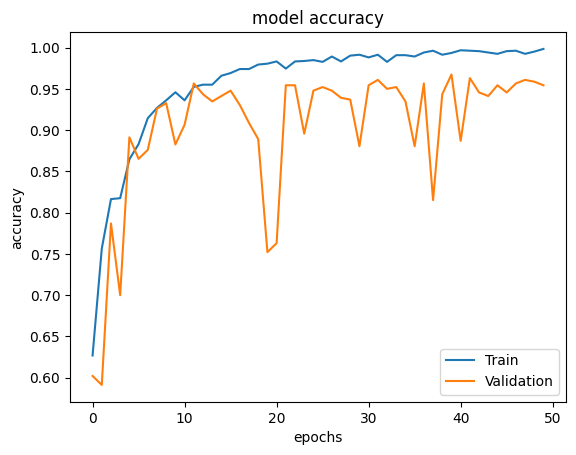

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
model.save('Gender.h5')

1/1 [==============================] - 0s 153ms/step


array(['Male'], dtype='<U6')

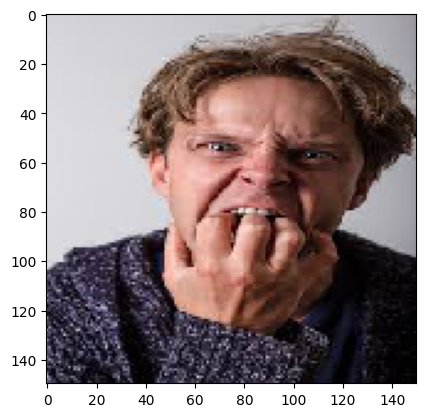

In [ ]:
model_CNN = load_model('Gender.h5')
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np 
filename = "/content/drive/MyDrive/Anh/a13.jpg"
predict = ['Female','Male']
predict = np.array(predict)
img = load_img(filename, target_size =(150,150))
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255


result = np.argmax(model_CNN.predict(img), axis = -1)
predict[result]


1/1 [==============================] - 0s 146ms/step


array(['Female'], dtype='<U6')

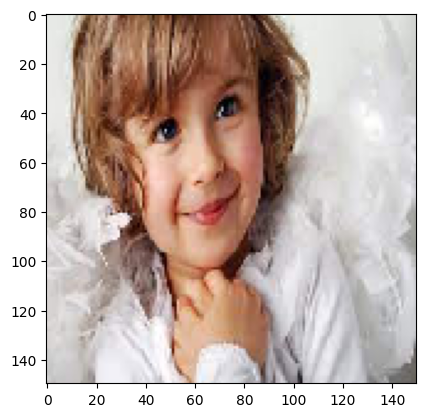

In [ ]:
model_CNN = load_model('Gender.h5')
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np 
filename = "/content/drive/MyDrive/Anh/a17.jpg"
predict = ['Female','Male']
predict = np.array(predict)
img = load_img(filename, target_size =(150,150))
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255


result = np.argmax(model_CNN.predict(img), axis = -1)
predict[result]


Mạng neural tích chập (CNN)